<a href="https://colab.research.google.com/github/MiguelNegron1/Telco-Customer-Churn-Analysis/blob/main/Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import google.colab  as file
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

q1 = pd.read_csv('https://raw.githubusercontent.com/MiguelNegron1/Telco-Customer-Churn-Analysis/refs/heads/main/q1_factors_for_churn.csv')
q2 = pd.read_csv('https://raw.githubusercontent.com/MiguelNegron1/Telco-Customer-Churn-Analysis/refs/heads/main/q2_customer_segment_more_churned.csv')
q3 = pd.read_csv('https://raw.githubusercontent.com/MiguelNegron1/Telco-Customer-Churn-Analysis/refs/heads/main/q3_monthly_charges.csv')

display(q1.head(), q2.head(), q3.head())


,category_type,max_churn_rate,min_churn_rate,churn_rate_gap
0,contract,42.71,2.83,39.88
1,internet_service,41.89,7.40,34.49
2,online_security,41.77,7.40,34.37
3,tech_support,41.64,7.40,34.24
4,online_backup,39.93,7.40,32.53


,gender,senior_citizen,people_with_dependents,people_with_partner,churn_rate_percent
0,Female,1,42,248,42.25
1,Male,0,1033,1389,23.28
2,Male,1,49,325,41.11
3,Female,0,986,1440,23.94


,spending_group,total_customers,churned_customers,churn_rate_percent
0,High ($60–$90),2386,809,33.91
1,Very High (>$90),1739,570,32.78
2,Medium ($30–$60),1265,328,25.93
3,Low (<$30),1653,162,9.80



#📊 Q1: What are the key factors that lead to customer churn?


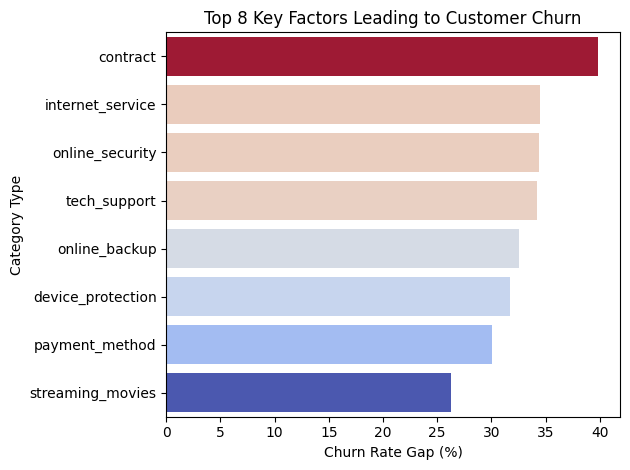

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

q1 = pd.read_csv('https://raw.githubusercontent.com/MiguelNegron1/Telco-Customer-Churn-Analysis/refs/heads/main/q1_factors_for_churn.csv')


top_factors = q1.sort_values('churn_rate_gap', ascending=False).head(8)

sns.barplot(data=top_factors, y='category_type', x='churn_rate_gap', palette='coolwarm', hue='churn_rate_gap', legend=False)
plt.title('Top 8 Key Factors Leading to Customer Churn')
plt.xlabel('Churn Rate Gap (%)')
plt.ylabel('Category Type')
plt.tight_layout()
plt.show()

##Insight:
###This chart shows which customer attributes (like contract type or internet service) are most strongly associated with churn variability.

#📊 Q2: Which customer segments have the highest churn rates?

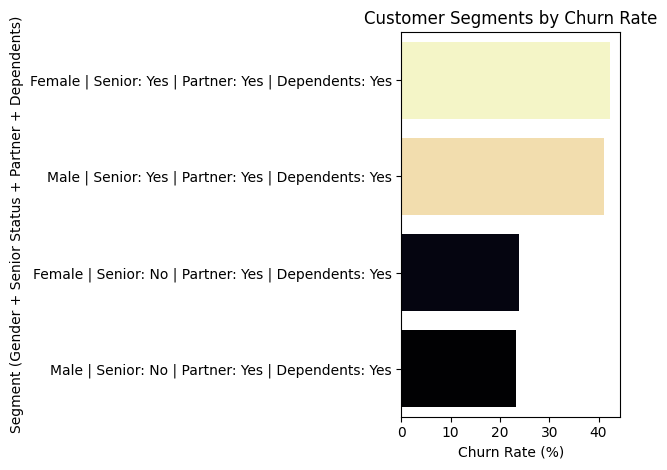

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

q2 = pd.read_csv('https://raw.githubusercontent.com/MiguelNegron1/Telco-Customer-Churn-Analysis/refs/heads/main/q2_customer_segment_more_churned.csv')
q2['segment'] = (
    q2['gender'] + ' | Senior: ' + q2['senior_citizen'].apply(lambda  x: 'Yes' if x > 0 else 'No')
    + ' | Partner: ' +  q2['people_with_partner'].apply(lambda x: 'Yes' if x > 0 else 'No')
    + ' | Dependents: ' + q2['people_with_dependents'].apply(lambda x: 'Yes' if x > 0 else 'No')
)

q2_sorted = q2.sort_values('churn_rate_percent', ascending=False)

sns.barplot(data=q2_sorted, x='churn_rate_percent', y='segment', palette='magma', hue='churn_rate_percent', legend=False)
plt.title('Customer Segments by Churn Rate')
plt.xlabel('Churn Rate (%)')
plt.ylabel('Segment (Gender + Senior Status + Partner + Dependents)')
plt.tight_layout()
plt.show()

##Insight:
This shows older customers, especially females, without dependents or partners, have the highest churn.

#📊 Q3: How does monthly spending affect churn?


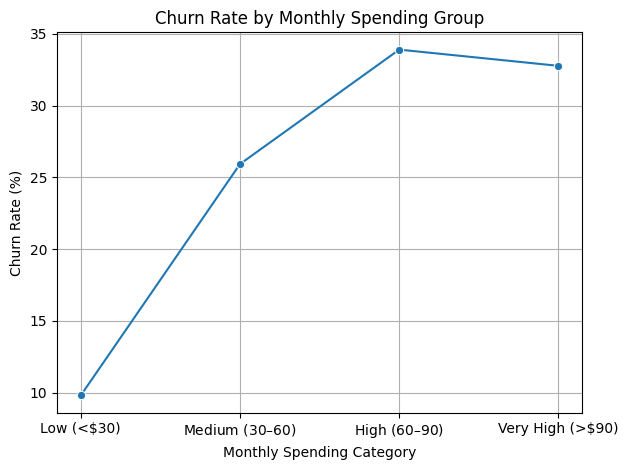

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

q3 = pd.read_csv('https://raw.githubusercontent.com/MiguelNegron1/Telco-Customer-Churn-Analysis/refs/heads/main/q3_monthly_charges.csv')

spending_order = ['Low (<$30)', 'Medium ($30–$60)', 'High ($60–$90)', 'Very High (>$90)']
q3['spending_group'] = pd.Categorical(q3['spending_group'], categories=spending_order, ordered=True)
q3 = q3.sort_values('spending_group')


sns.lineplot(data=q3, x="spending_group", y="churn_rate_percent", marker="o")
plt.title("Churn Rate by Monthly Spending Group")
plt.xlabel("Monthly Spending Category")
plt.ylabel("Churn Rate (%)")
plt.tight_layout()
plt.grid(True)
plt.show()

##Insight:

Higher monthly spending is strongly correlated with higher churn. This suggests value perception could be a churn trigger.

# 📌 Business Takeaways
- Long-term contracts and service bundling reduce churn.
- Older individuals without partners or dependents churn more.
- High spenders churn more—possibly due to perceived lack of value.

These insights can guide retention strategies, personalized offers, and service enhancements.
